# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

### Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import country_converter

sns.set_style('darkgrid')

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [4]:
df = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df.shape

(4324, 9)

In [6]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [7]:
df.isna().values.any()

True

In [8]:
df.dropna(inplace = True)
df.isna().values.any()

False

In [9]:
df.duplicated().values.any()

False

## Descriptive Statistics

In [10]:
df.describe()

,Unnamed: 0.1,Unnamed: 0
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    964 non-null    int64 
 1   Unnamed: 0      964 non-null    int64 
 2   Organisation    964 non-null    object
 3   Location        964 non-null    object
 4   Date            964 non-null    object
 5   Detail          964 non-null    object
 6   Rocket_Status   964 non-null    object
 7   Price           964 non-null    object
 8   Mission_Status  964 non-null    object
dtypes: int64(2), object(7)
memory usage: 75.3+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

<Axes: xlabel='count', ylabel='Organisation'>

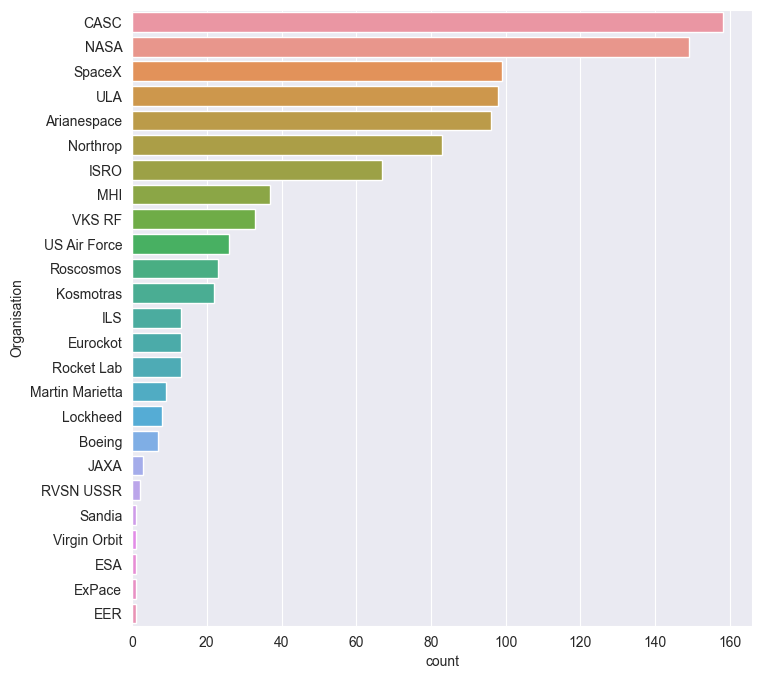

In [12]:
plt.figure(figsize = (8, 8))
sns.barplot(df['Organisation'].value_counts().reset_index(), y = 'Organisation', x = 'count')

In [13]:
px.histogram(df['Organisation'].value_counts().reset_index(), x = 'Organisation', y = 'count', color = 'Organisation')

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [14]:
df['Rocket_Status'].value_counts()

Rocket_Status
StatusActive     586
StatusRetired    378
Name: count, dtype: int64

<Axes: xlabel='Rocket_Status', ylabel='count'>

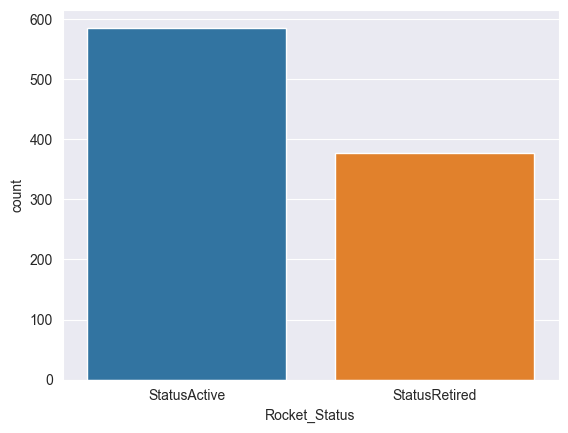

In [15]:
sns.barplot(df['Rocket_Status'].value_counts().reset_index(), x = 'Rocket_Status', y = 'count')

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [16]:
df['Mission_Status'].value_counts()

Mission_Status
Success              910
Failure               36
Partial Failure       17
Prelaunch Failure      1
Name: count, dtype: int64

<Axes: xlabel='Mission_Status', ylabel='count'>

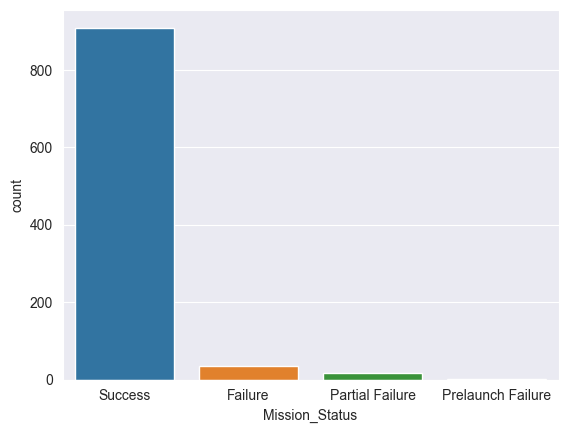

In [17]:
sns.barplot(df['Mission_Status'].value_counts().reset_index(), x = 'Mission_Status', y = 'count')

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

<Axes: xlabel='Price', ylabel='Count'>

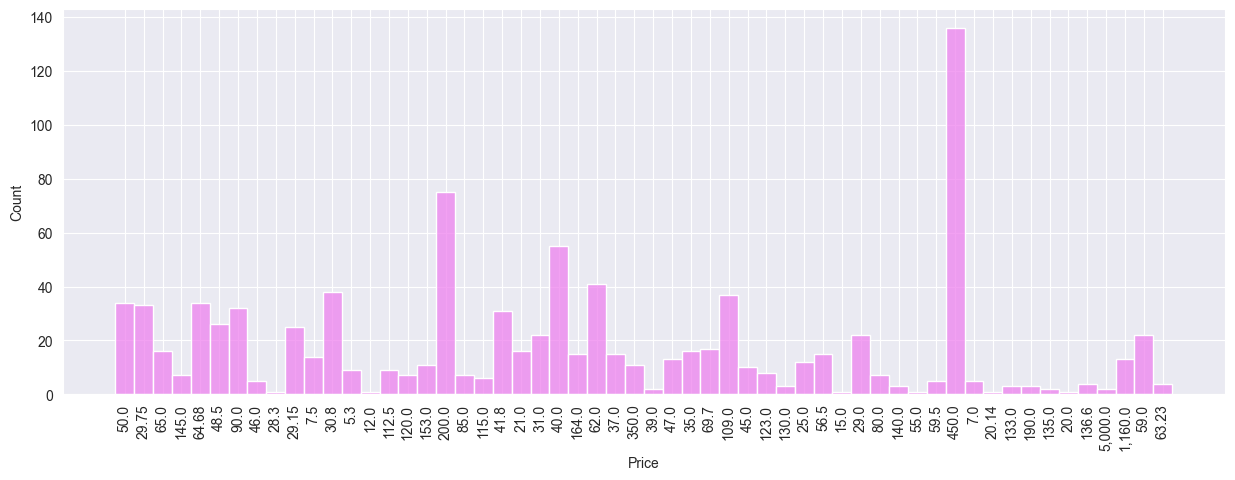

In [18]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 90)
sns.histplot(df['Price'], color = 'violet')

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [19]:
df['Country'] = df['Location'].apply(lambda x: country_converter.convert(x.split(',')[-1].strip()))

Yellow Sea not found in regex
Pacific Missile Range Facility not found in regex
Gran Canaria not found in regex
Gran Canaria not found in regex


In [20]:
px.choropleth(df['Country'].value_counts().reset_index(),
locations = 'Country', color = 'count', color_continuous_scale = 'matter')

# Use a Choropleth Map to Show the Number of Failures by Country


In [21]:
px.choropleth(df.loc[lambda x: x['Mission_Status'] == 'Failure']['Country'].value_counts().reset_index(),
locations = 'Country', color = 'count', color_continuous_scale = 'matter')

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [22]:
px.sunburst(df, path = ['Mission_Status', 'Organisation', 'Country'])

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [23]:
df['Price'] = df['Price'].apply(lambda x: float(x.replace(',', '')))

In [24]:
df.groupby('Organisation')['Price'].sum()

Organisation
Arianespace       16,345.00
Boeing             1,241.00
CASC               6,340.26
EER                   20.00
ESA                   37.00
Eurockot             543.40
ExPace                28.30
ILS                1,320.00
ISRO               2,177.00
JAXA                 168.00
Kosmotras            638.00
Lockheed             280.00
MHI                3,532.50
Martin Marietta      721.40
NASA              76,280.00
Northrop           3,930.00
RVSN USSR         10,000.00
Rocket Lab            97.50
Roscosmos          1,187.50
Sandia                15.00
SpaceX             5,444.00
ULA               14,798.00
US Air Force       1,550.92
VKS RF             1,548.90
Virgin Orbit          12.00
Name: Price, dtype: float64

In [25]:
px.histogram(df.groupby('Organisation')['Price'].sum().reset_index(), y = 'Price', x = 'Organisation', color = 'Organisation')

# Analyse the Amount of Money Spent by Organisation per Launch

In [26]:
df.groupby('Organisation')['Price'].mean()

Organisation
Arianespace         170.26
Boeing              177.29
CASC                 40.13
EER                  20.00
ESA                  37.00
Eurockot             41.80
ExPace               28.30
ILS                 101.54
ISRO                 32.49
JAXA                 56.00
Kosmotras            29.00
Lockheed             35.00
MHI                  95.47
Martin Marietta      80.16
NASA                511.95
Northrop             47.35
RVSN USSR         5,000.00
Rocket Lab            7.50
Roscosmos            51.63
Sandia               15.00
SpaceX               54.99
ULA                 151.00
US Air Force         59.65
VKS RF               46.94
Virgin Orbit         12.00
Name: Price, dtype: float64

In [27]:
px.bar(df.groupby('Organisation')['Price'].mean().reset_index(),
color = 'Organisation', x = 'Organisation', y = 'Price')

# Chart the Number of Launches per Year

In [28]:
df['Year'] = df['Date'].apply(lambda x: x.split(',')[1].split()[0])

<Axes: xlabel='Year', ylabel='count'>

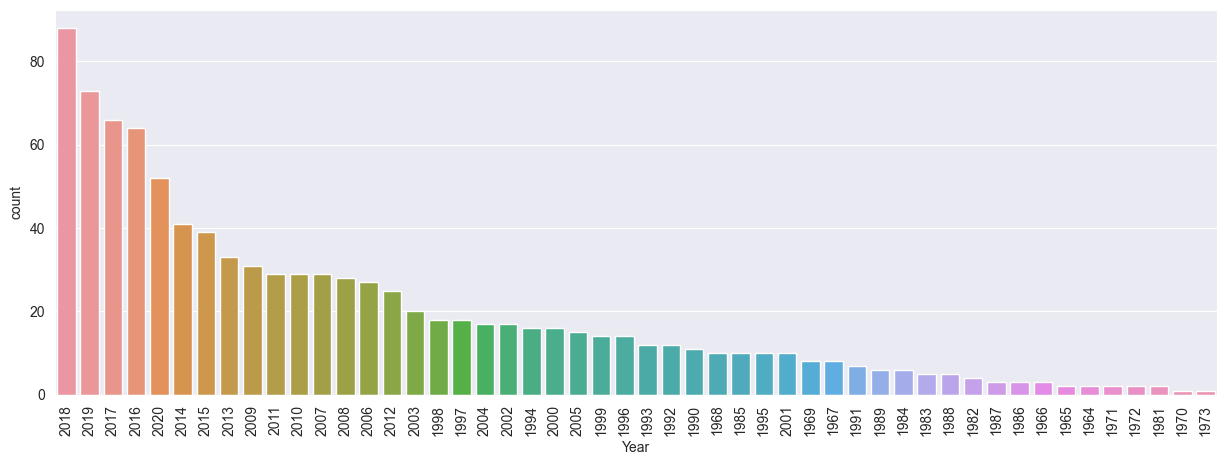

In [29]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 90)
sns.barplot(df['Year'].value_counts().reset_index(), x = 'Year', y = 'count')

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [30]:
df['YM'] = df['Date'].apply(lambda x: x.split()[3] + ' ' + x.split()[1])
df['YM'].value_counts().max()

12

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [31]:
df['Month'] = df['Date'].apply(lambda x: x.split(',')[0].split()[1])
px.bar(df['Month'].value_counts().reset_index(), x = 'Month', y = 'count', color = 'Month')

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

<Axes: xlabel='Year', ylabel='Price'>

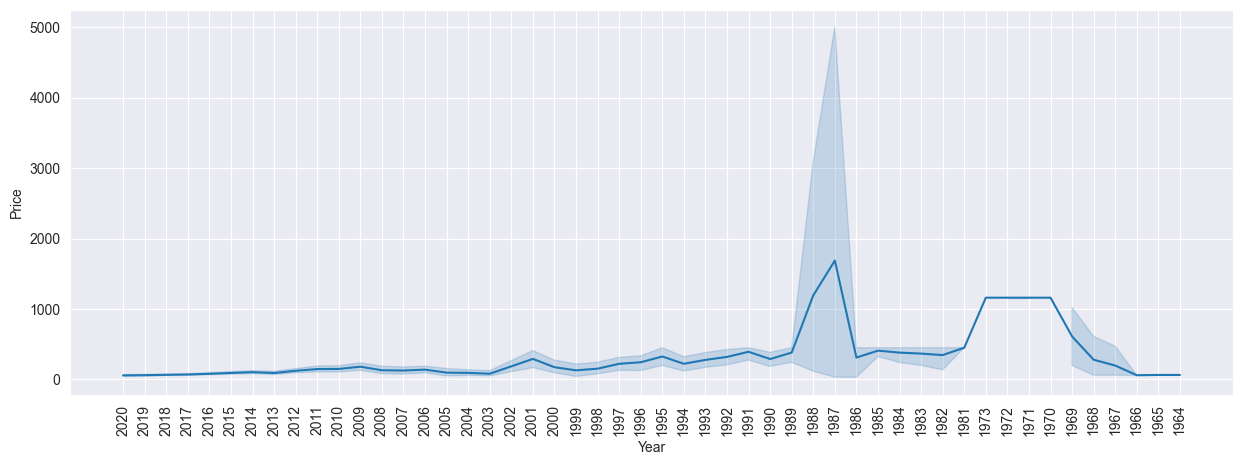

In [32]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 90)
sns.lineplot(df, x = 'Year', y = 'Price')

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [33]:
px.bar(df['Organisation'].value_counts().head(10).reset_index(), 'Organisation', 'count', 'Organisation')

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [34]:
df['Year'] = df['Year'].apply(lambda x: int(x))

<Axes: xlabel='Country', ylabel='count'>

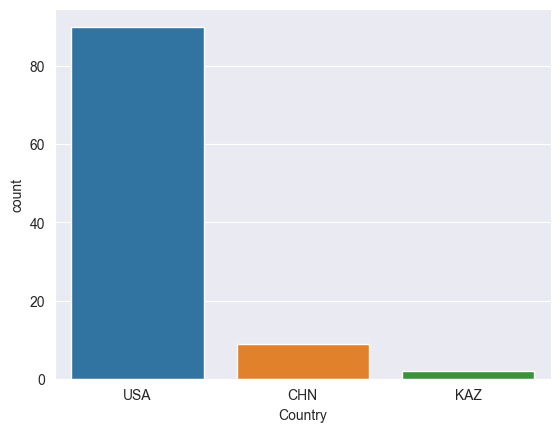

In [35]:
sns.barplot(df.loc[lambda x: x['Year'] <= 1991]['Country'].value_counts().reset_index(), y = 'count', x = 'Country')

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [36]:
px.pie(df['Country'].value_counts().loc[['USA', 'RUS']].reset_index(), names = 'Country', hole = 0.5,
color_discrete_sequence = ['pink', 'purple'],
values = 'count').update_traces(textfont_size = 15, textinfo = 'label+percent', textposition = 'outside')

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [37]:
px.bar(df[(df['Country'] == 'USA') | (df['Country'] == 'RUS')][['Country', 'Year']].value_counts().reset_index()
, x = 'Year', y = 'count', color = 'Country')

## Chart the Total Number of Mission Failures Year on Year.

In [38]:
px.bar(df[df['Mission_Status'] == 'Failure'].value_counts('Year'))

<Axes: xlabel='Year', ylabel='count'>

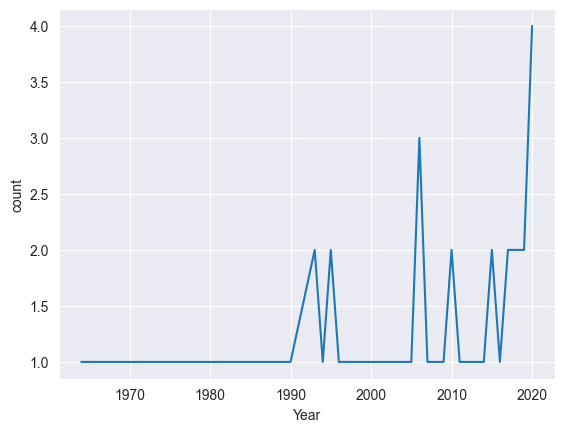

In [39]:
sns.lineplot(df[df['Mission_Status'] == 'Failure'].value_counts('Year'))

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [40]:
a=df[df['Mission_Status']=='Failure'].value_counts('Year') / df[df['Mission_Status']=='Success'].value_counts('Year')
px.bar(a.fillna(0) * 100)

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [42]:
px.histogram(df[['Year', 'Country']].value_counts().reset_index(), x = 'Year', y = 'count', color = 'Country')

In [43]:
px.bar(df[['Year', 'Country']].value_counts().reset_index().groupby('Year').max().reset_index(),
x = 'Year', y = 'count', color = 'Country')

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [44]:
a = df.loc[lambda x: (x['Year'] >= 1970) & (x['Year'] < 1990)][['Year', 'Organisation']].value_counts()
px.bar(a.reset_index().groupby('Year').max().reset_index(),x = 'Year', y = 'count', color = 'Organisation')

In [45]:
a = df[df['Year'] >= 2018][['Year', 'Organisation']].value_counts().reset_index().groupby('Year').max().reset_index()
px.bar(a, x = 'Year', y = 'count', color = 'Organisation')